In [4]:
using DataFrames
using CSV
using Statistics
using LinearAlgebra
include("../../plotting/triangular_plots/triangular_mi.jl")

triangle_plot (generic function with 1 method)

In [207]:
function get_data_phaseDiag(path::String)
    data = CSV.read(path, DataFrame, comment = "#")
    data.p = eval.(Meta.parse.(data.p))
    data.p2d = projection.(data.p)
    return data
end

get_data_phaseDiag (generic function with 1 method)

In [404]:
data_4_10  = get_data_phaseDiag("data/phaseDiagram/8/a1/20/mean.csv");
sort!(data_4_10, [:p2d])
data_4_10_2  = get_data_phaseDiag("data/phaseDiagram/8/y/20/mean.csv");
sort!(data_4_10_2, [:p2d])
data_4_10_3  = get_data_phaseDiag("data/phaseDiagram/8/a3/100/mean.csv");
sort!(data_4_10_3, [:p2d])
# data_4_z10 = get_data_phaseDiag("data/phaseDiagram/4/z/10/mean.csv");
# data_8_z10 = get_data_phaseDiag("data/phaseDiagram/8/z/10/mean.csv");
# data_4_x1_10 = get_data_phaseDiag("data/phaseDiagram/4/x1/10/mean.csv");

Row,p,EE,TMI,p2d
,Tuple…,Float64,Float64,Tuple…
1,"(1.0, 0.0, 0.0)",191.0,1.0,"(-0.707107, -0.408248)"
2,"(0.95, 0.0, 0.05)",191.06,0.99,"(-0.671751, -0.347011)"
3,"(0.95, 0.05, 0.0)",191.0,1.0,"(-0.636396, -0.408248)"
4,"(0.9, -0.0, 0.1)",191.33,0.98,"(-0.636396, -0.285774)"
5,"(0.9, 0.05, 0.05)",191.09,0.99,"(-0.601041, -0.347011)"
6,"(0.85, 0.0, 0.15)",191.86,0.86,"(-0.601041, -0.224537)"
7,"(0.9, 0.1, 0.0)",191.0,1.0,"(-0.565685, -0.408248)"
8,"(0.85, 0.05, 0.1)",191.48,0.91,"(-0.565685, -0.285774)"
9,"(0.8, -0.0, 0.2)",192.39,0.43,"(-0.565685, -0.163299)"


In [405]:
dta = copy(data_4_10)
dta.EE .+= data_4_10_2.EE
dta.EE .+= data_4_10_3.EE
dta.EE /= 3
dta.TMI .+= data_4_10_2.TMI
dta.TMI .+= data_4_10_3.TMI
dta.TMI /= 3

231-element Vector{Float64}:
 1.0
 0.9966666666666667
 0.85
 0.9933333333333333
 0.8799999999999999
 0.9533333333333333
 0.6166666666666667
 0.6866666666666666
 0.61
 0.43999999999999995
 ⋮
 0.6333333333333333
 0.7566666666666667
 0.5433333333333333
 0.91
 0.8666666666666667
 0.8333333333333334
 0.9566666666666667
 1.0
 1.0

In [392]:
# pth = "plots/phaseDiagram/8/a3ya3/100/"
mkpath(pth)
dta = data_4_10;

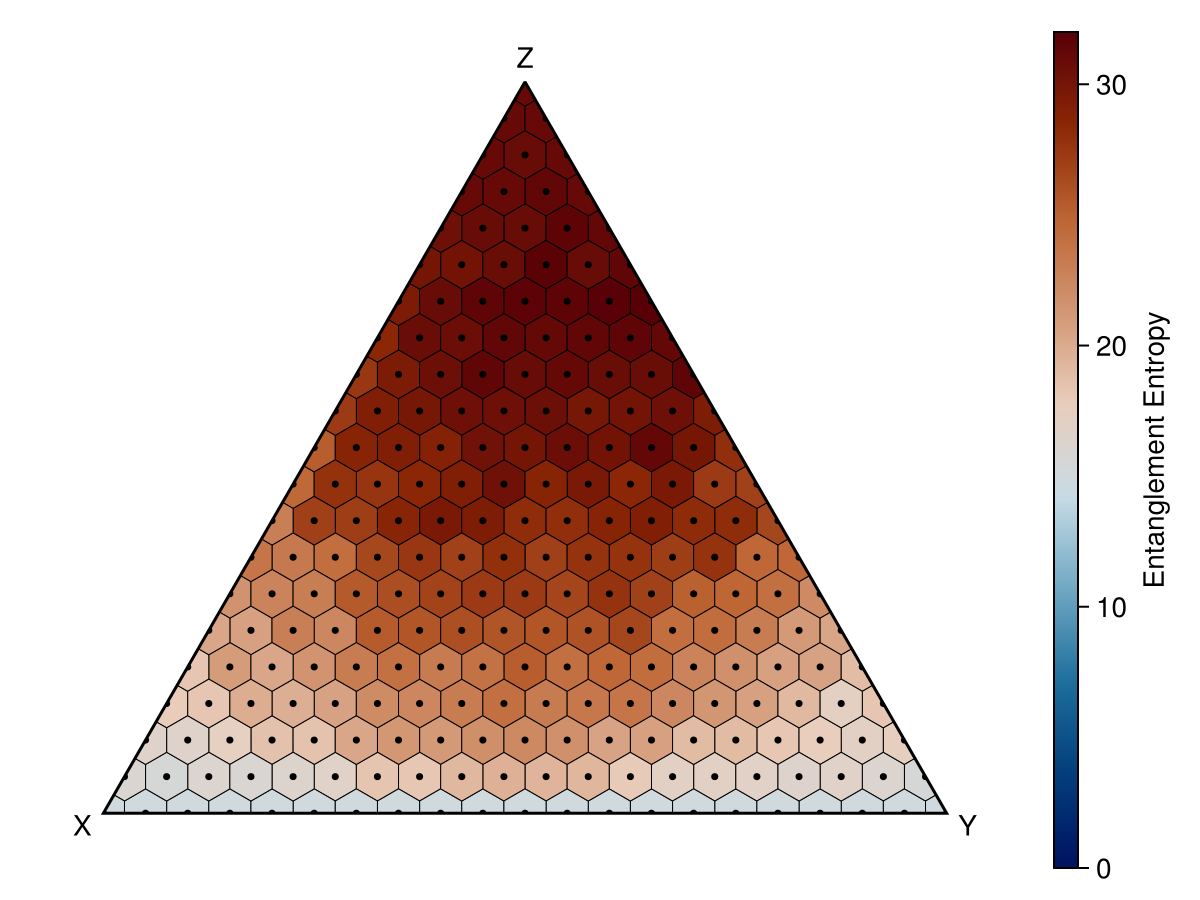

In [289]:
# fig = triangle_plot(dta.p2d, dta.EE_x1, colorrange = (0, maximum(dta.EE_x1)), label = "Entanglement Entropy")
# fig = triangle_plot(dta.p2d, dta.EE_x2, colorrange = (0, maximum(dta.EE_x2)), label = "Entanglement Entropy")
# fig = triangle_plot(dta.p2d, dta.EE_xz, colorrange = (0, maximum(dta.EE_xz)), label = "Entanglement Entropy")
# fig = triangle_plot(dta.p2d, dta.EE_y, colorrange = (0, maximum(dta.EE_y)), label = "Entanglement Entropy")
# fig = triangle_plot(dta.p2d, dta.EE_y1, colorrange = (0, maximum(dta.EE_y1)), label = "Entanglement Entropy")
fig = triangle_plot(dta.p2d, dta.EE_z, colorrange = (0, maximum(dta.EE_z)), label = "Entanglement Entropy")
# save(pth * "EE.png", fig)
fig

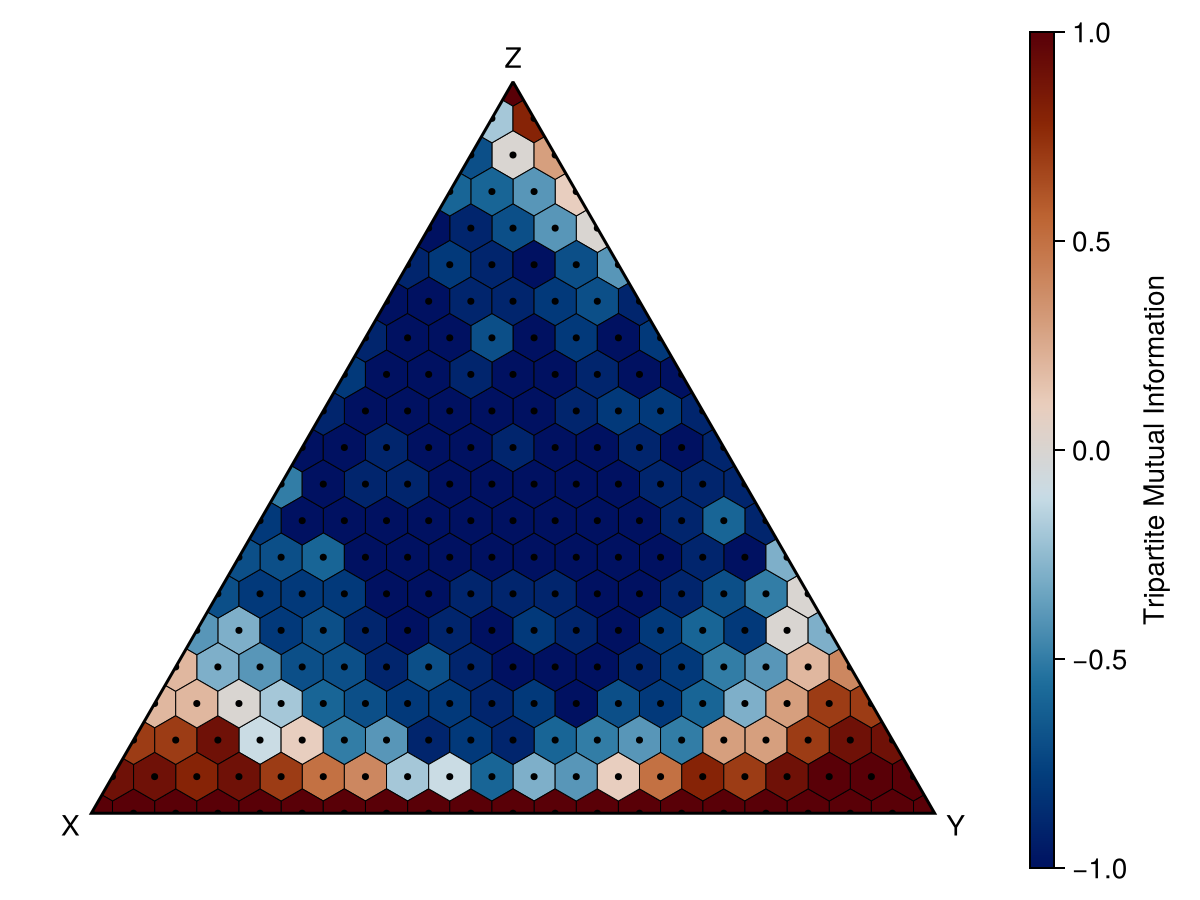

In [296]:
# fig = triangle_plot(dta.p2d, dta.TMI_x1, colorrange = (minimum(dta.TMI_x1),maximum(dta.TMI_x1)), label = "Tripartite Mutual Information")
# fig = triangle_plot(dta.p2d, dta.TMI_x2, colorrange = (minimum(dta.TMI_x2),maximum(dta.TMI_x2)), label = "Tripartite Mutual Information")
# fig = triangle_plot(dta.p2d, dta.TMI_xz, colorrange = (minimum(dta.TMI_xz),maximum(dta.TMI_xz)), label = "Tripartite Mutual Information")
# fig = triangle_plot(dta.p2d, dta.TMI_y, colorrange = (minimum(dta.TMI_y),maximum(dta.TMI_y)), label = "Tripartite Mutual Information")
# fig = triangle_plot(dta.p2d, dta.TMI_y2, colorrange = (minimum(dta.TMI_y2),maximum(dta.TMI_y2)), label = "Tripartite Mutual Information")
fig = triangle_plot(dta.p2d, dta.TMI_z, colorrange = (minimum(dta.TMI_z),maximum(dta.TMI_z)), label = "Tripartite Mutual Information")
# save(pth * "TMI.png", fig)
#(minimum(dta.TMI),maximum(dta.TMI))
fig

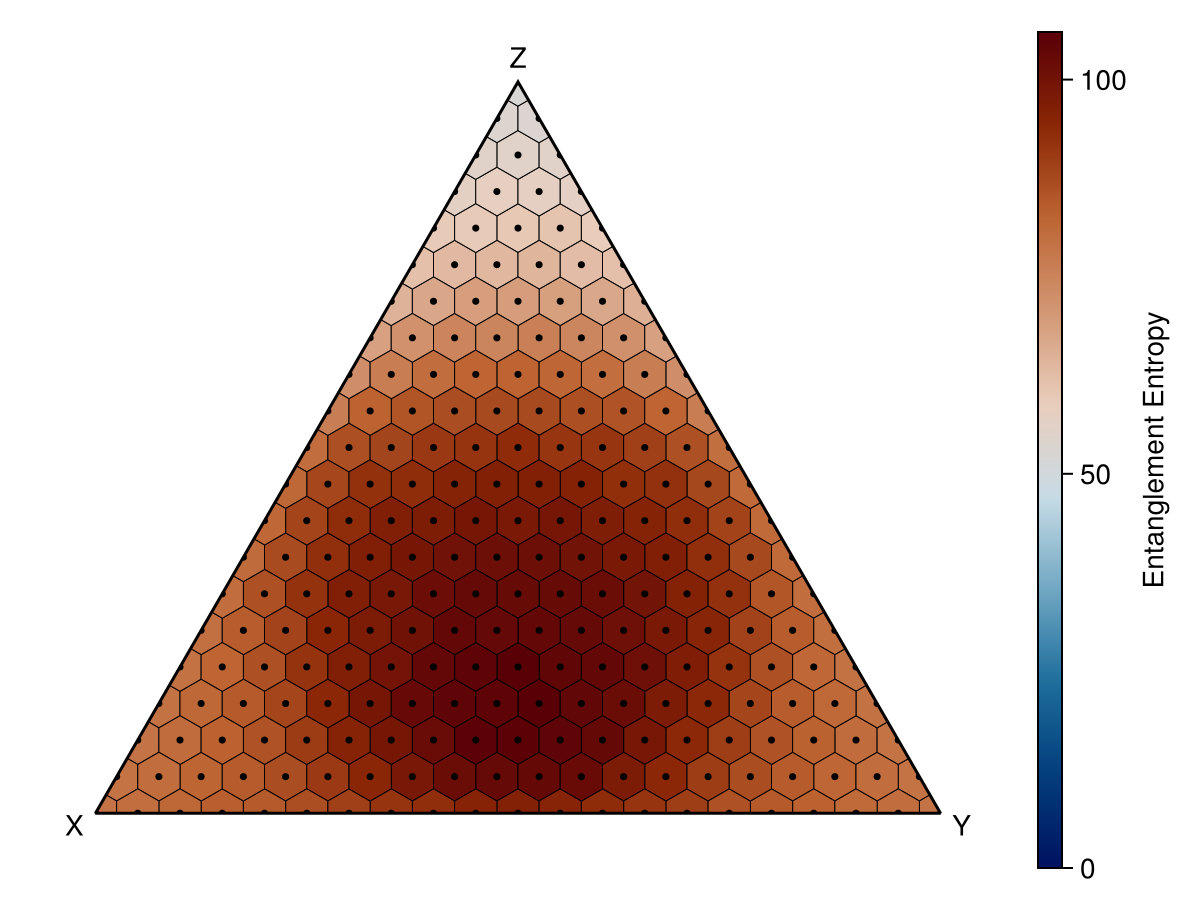

In [397]:
fig = triangle_plot(dta.p2d, dta.EE, colorrange = (0, maximum(dta.EE)), label = "Entanglement Entropy")
# save(pth * "EE.png", fig)
fig

In [402]:
dta = data_4_10_3

Row,p,EE,TMI,p2d
,Tuple…,Float64,Float64,Tuple…
1,"(1.0, 0.0, 0.0)",47.0,1.0,"(-0.707107, -0.408248)"
2,"(0.95, 0.0, 0.05)",47.05,0.95,"(-0.671751, -0.347011)"
3,"(0.95, 0.05, 0.0)",47.0,-0.9,"(-0.636396, -0.408248)"
4,"(0.9, -0.0, 0.1)",47.15,0.65,"(-0.636396, -0.285774)"
5,"(0.9, 0.05, 0.05)",47.05,-0.15,"(-0.601041, -0.347011)"
6,"(0.85, 0.0, 0.15)",47.15,0.3,"(-0.601041, -0.224537)"
7,"(0.9, 0.1, 0.0)",47.0,-1.4,"(-0.565685, -0.408248)"
8,"(0.85, 0.05, 0.1)",47.0,-1.15,"(-0.565685, -0.285774)"
9,"(0.8, -0.0, 0.2)",47.25,-0.45,"(-0.565685, -0.163299)"


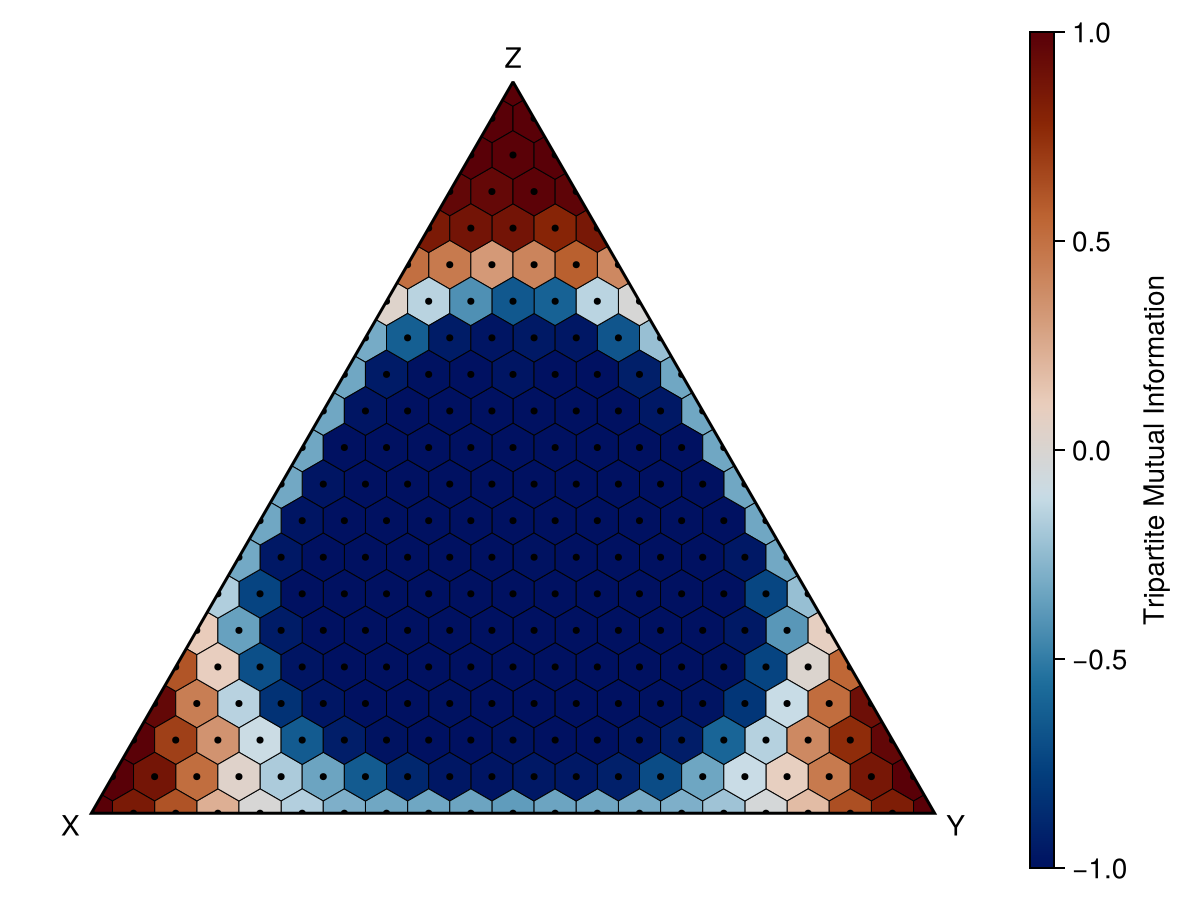

In [406]:
fig = triangle_plot(dta.p2d, dta.TMI, colorrange = (minimum(dta.TMI), maximum(dta.TMI)), label = "Tripartite Mutual Information")
# save(pth * "TMI.png", fig)
fig

In [271]:
include("10_3_b.jl")

main

In [240]:
s, tmi = main([0.5,0.5,0.], 4, cut = :x, keep_result=false, phases=false, iterations = 80, thermalization = 0, between_measurements = 0, newstarts = 1) 

(Any[44, 47, 47, 47, 43, 45, 40, 43, 44, 46  …  47, 47, 44, 46, 48, 42, 44, 44, 43, 50], Any[-5, -6, -7, -3, -5, -4, -2, -4, -4, -4  …  -4, -3, -3, -4, -5, -6, -2, -3, -3, -4])

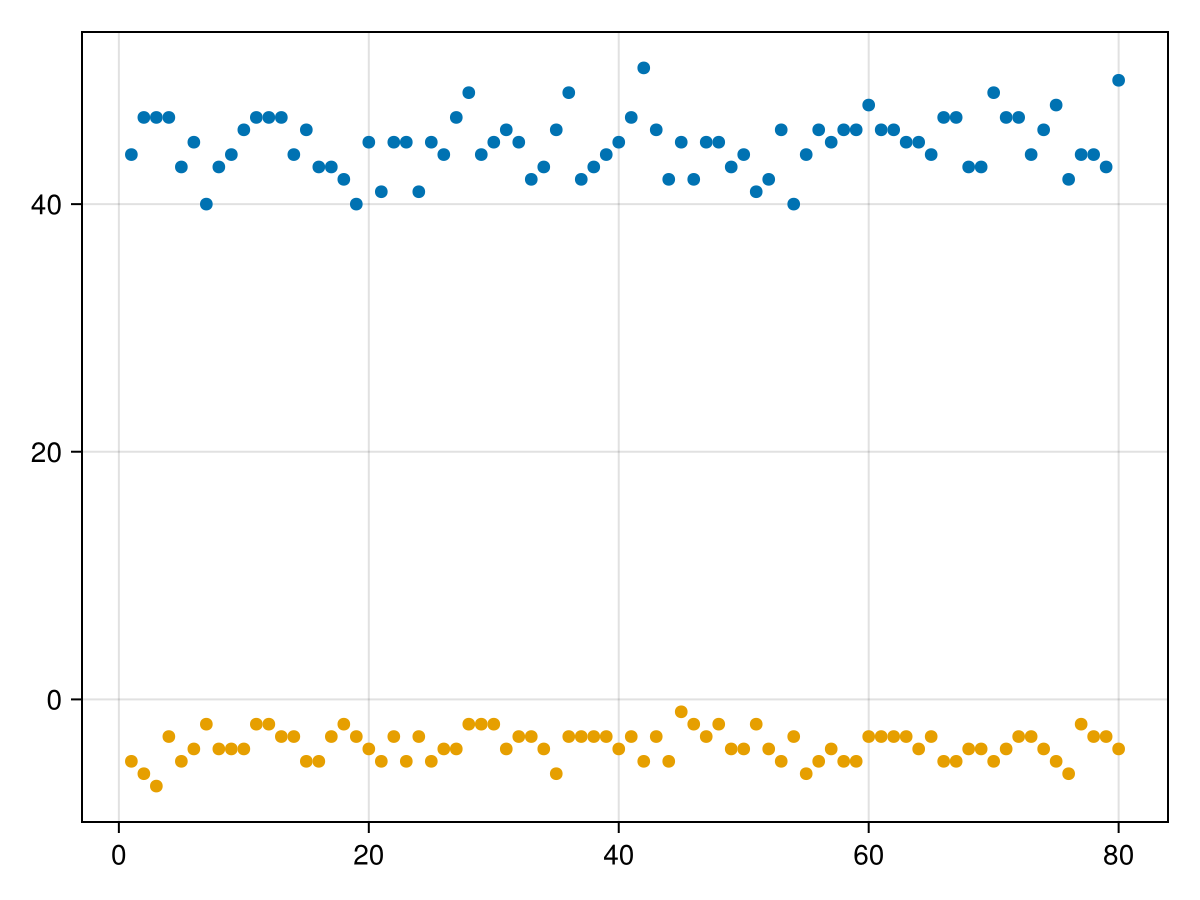

In [242]:
fig = Figure()
ax = Axis(fig[1,1])
plot!(ax,s)
plot!(ax,tmi)

fig